In [3]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from myDataSet import *
from myNetworks import *
from myUtil import *
from tqdm import tqdm

In [4]:
test = {"a":0,"b":33}
test

dict_keys(['a', 'b'])

In [2]:
# TODO: Implement GPU memory alloc in case of CUDA
# TODO: enable parallel GPU computation

In [3]:
# Set up the dataset.
image_directory = "Insects"
annotations_file_directory = "insects.csv"
image_dims = (520,520)
my_transform = torchvision.transforms.Resize(image_dims)
dataset = MyCustomImageDataset(annotations_file_dir=annotations_file_directory,
                               image_directory_path=image_directory,
                               transform=my_transform)

# Preparing data for learning (normalization, one-hot encoding and batching)
my_batch_size, my_data_fraction, my_test_fraction, my_validation_fraction = 4, 0.05, 0.2, 0.3
prepped_data = DataPrep(dataset=dataset,
                        batch_size=my_batch_size,
                        data_fraction=my_data_fraction,
                        test_fraction=my_test_fraction,
                        validation_fraction=my_validation_fraction)

my_X_train_batches, my_Y_train_batches = prepped_data.train_X, prepped_data.train_Y
my_X_validation_batches, my_Y_validation_batches = prepped_data.validation_X, prepped_data.validation_Y
print("Shape of single X batch: ",tuple(my_X_train_batches[0].shape))

Initial nr. of batches:  181
Nr. batches after 'data_fraction' splitting:  9
Nr. batches set aside for testing:  1
Nr. batches set aside for validation:  1
Nr. batches remaining for training:  7
Shape of single X batch:  (4, 3, 520, 520)


In [4]:
# Creating instance of neural network
my_nr_channels = my_X_train_batches[0].shape[1]
my_nr_classes = my_Y_train_batches[0].shape[1]
my_input_dimensions = (my_X_train_batches[0].shape[2], my_X_train_batches[0].shape[3])

my_net = NeuralNet(channels_in=my_nr_channels,
                   nr_classes=my_nr_classes,
                   input_dimensions=my_input_dimensions)

In [5]:
train_accuracies, train_losses, validation_accuracies, validation_losses = my_net.train_network(
                                                        train_data_batches=my_X_train_batches,
                                                      train_labels_batches=my_Y_train_batches,
                                                   validation_data_batches=my_X_validation_batches,
                                                 validation_labels_batches=my_Y_validation_batches,
                                                                    epochs=20,
                                                               device_name='cpu')

  5%|▌         | 1/20 [00:08<02:47,  8.83s/it]

Model saved at epoch:  1 , with validation acc:  tensor(75.) %


100%|██████████| 20/20 [02:52<00:00,  8.61s/it]


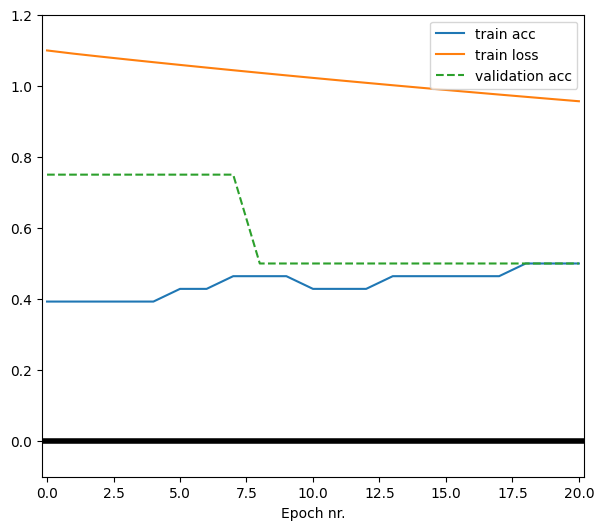

In [6]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
epochs = [i for i in range(len(train_accuracies))]
ax.plot(epochs,train_accuracies,label="train acc")
ax.plot(epochs,train_losses,label="train loss")
ax.plot(epochs,validation_accuracies,ls='--',label="validation acc")
#ax.plot(epochs,test_losses,label="test loss")
ax.set_ylim(-0.1,1.2)
ax.set_xlim(-0.2,20.2)
ax.hlines(0,-0.2,20.2,lw=4,color="k")
ax.set_xlabel("Epoch nr.")
ax.legend(loc=1)
plt.show()

In [7]:
print(train_accuracies)

[tensor(0.3929), tensor(0.3929), tensor(0.3929), tensor(0.3929), tensor(0.3929), tensor(0.4286), tensor(0.4286), tensor(0.4643), tensor(0.4643), tensor(0.4643), tensor(0.4286), tensor(0.4286), tensor(0.4286), tensor(0.4643), tensor(0.4643), tensor(0.4643), tensor(0.4643), tensor(0.4643), tensor(0.5000), tensor(0.5000), tensor(0.5000)]


In [8]:
test_model(my_net,prepped_data)

Testing model on all available test batches..

 #####|  1 / 4  items in  1  test batches predicted correctly ~ acc:  0.25  |#####
